# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Novan]
- **Email:** [novancentauri@gmail.com]
- **ID Dicoding:** [zenoktav07]

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren penggunaan sepeda per bulan per tahun**

- **Bagaimana perbandingan penggunaan sepeda antara hari kerja dan akhir pekan**

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path1 = "data/day.csv"

In [4]:
file_path2 = "data/hour.csv"

## Data Wrangling

### Gathering Data

In [5]:
df_day = pd.read_csv(file_path1)
df_hour = pd.read_csv(file_path2)

In [6]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dataset df_day memiliki kumpulan data penyewa sepeda berdasarkan harian
- dataset df_hour memiliki kumpulan data penyewa sepeda berdasarkan per jam

### Assessing Data

**Menilai Data df_day**

In [8]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("Duplikasi: ", df_day.duplicated().sum())

Duplikasi:  0


In [11]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Data df_hour**

In [12]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
df_hour.duplicated().sum()

0

In [15]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- **Menilai Data df_day**:
  Dataframe memiliki 731 baris data dan 16 kolom. Tidak terdeteksi adanya missing values pada dataframe tersebut dan tidak ada data yang duplikat. Tetapi memiliki 1 kesalahan yakni pada tipe data pada kolom dteday yang seharusnya adalah bertipe datetime
- **Menilai Data df_hour**:
  Dataframe memiliki 17379 baris data dan 17 kolom. Sama seperti df_day, tidak terdeteksi adanya missing values pada dataframe tersebut dan tidak ada data yang duplikat. Tetapi memiliki 1 kesalahan yakni pada tipe data pada kolom dteday yang seharusnya adalah bertipe datetime

### Cleaning Data

**Membersihkan Data df_day**

In [16]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [17]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan Data df_hour**

In [18]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [19]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data df_day dan df_hour terdapat kesalahan dalam tipe data dteday yang awalnya berupa object. Pengubahan tipe data menjadi datetime dilakukan untuk dapat digunakan secara dalam analisis berbasis waktu


## Exploratory Data Analysis (EDA)

### Eksplorasi Data df_day

In [20]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Menambahkan kolom nama bulan**

In [21]:
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
df_day["month_name"] = df_day["mnth"].sort_values(ascending=False).map(month_mapping)
df_day["month_name"] = pd.Categorical(df_day["month_name"], categories=month_mapping.values(), ordered=True)

**Menambahkan kolom nama tahun**

In [22]:
year_mapping = {
    0: 2011, 1: 2012,
}
df_day["yr"] = df_day["yr"].sort_values(ascending=False).map(year_mapping)
df_day["year"] = pd.Categorical(df_day["yr"], categories=year_mapping.values(), ordered=True)

**Grouping data jumlah sewa berdasarkan tahun dan bulanan**

In [23]:
total_cnt_permonth_peryear = df_day.groupby(by=["yr", "month_name"]).agg({
    "cnt": "sum"
}).sort_values(by="month_name").reset_index()

total_cnt_permonth_peryear.rename(
    columns={"yr": "Year",
             "month_name": "Month",
             "cnt": "Total Count"
}, inplace=True)
total_cnt_permonth_peryear

<ipython-input-23-4c6adb988c60>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cnt_permonth_peryear = df_day.groupby(by=["yr", "month_name"]).agg({


,Year,Month,Total Count
0,2011,Jan,38189
1,2012,Jan,96744
2,2011,Feb,48215
3,2012,Feb,103137
4,2011,Mar,64045
5,2012,Mar,164875
6,2011,Apr,94870
7,2012,Apr,174224
8,2011,May,135821
9,2012,May,195865


**Menambah kolom is_weekend**

In [24]:
df_day["is_weekend"] = df_day["weekday"].apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

**Grouping data jumlah sewa berdasarkan hari libur**

In [25]:
total_cnt_perweekend = df_day.groupby(by=["is_weekend"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).reset_index()

labels = total_cnt_perweekend
total_cnt_perweekend

,is_weekend,cnt
0,Weekday,2370845
1,Weekend,921834


**Insight:**
- Diperoleh infomasi dari dataset tersebut yaitu memiliki 731 jumlah entry catatan dengan jumlah total sewa sepeda kisaran 22 hingga 8714 yang rata ratanya 4504,34 dan standar deviasinya adalah 1937,21.
- Menambahkan kolom month_name untuk mengonversi angka bulan 1-12 pada kolom mnth menjadi nama bulan singkatan dan mengatur kolom month_name sebagai kategori terurut.
- Menambahkan kolom year untuk mengonversi angka tahun 0 & 1 pada kolom yr menjadi nama tahun.
- Menghitung total penggunaan sepeda tiap bulan untuk setiap tahun menggunakan grouping. Informasi yang didapat adalah tabel yang menunjukkan jumlah total (Total Count) penggunaan sepeda berdasarkan bulan (Month) dan tahun (Year). Tabel disajikan dalm urutan bulan janurari hingga desember pada setiap tahun.
- Menambahkan kolom is_weekend untuk memberi keterangan anga pada kolom weekday untuk menginformasikan angka tersebut merupakan hari kerja atau weekend. label "Weekend" untuk hari Minggu (0) dan Sabtu (6), sedangkan "Weekday" untuk hari lainnya.
- Mengelompokkan data berdasarkan kolom is_weekend dan menghitung jumlah total penggunaan sepeda untuk masing-masing kategori. Dari pengelompokkan tersebut, terdapat 2 buah data yaitu total penggunaan sepeda di hari kerja(Weekday) sebesar 2370845 dan total penggunaan sepeda di akhir pekan(weekend) sebesar 921834. Kemudian data tersebut berdasarkan cnt dari yang terbesar

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda per bulan per tahun

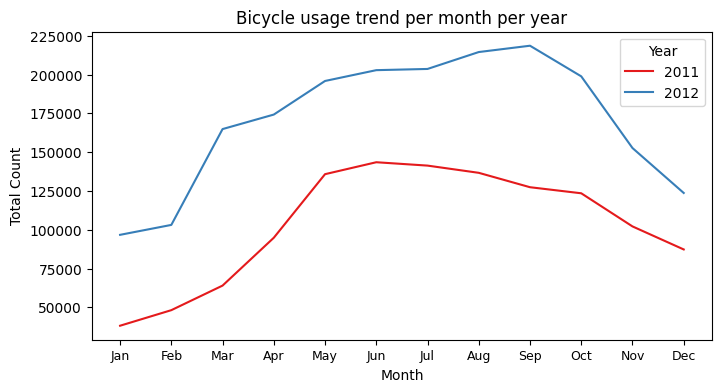

In [26]:
plt.figure(figsize=(8, 4))
sns.lineplot(x="Month", y="Total Count", hue="Year", data=total_cnt_permonth_peryear, palette='Set1')
plt.title("Bicycle usage trend per month per year")
plt.xticks(fontsize=9)
plt.show()

### Pertanyaan 2: Bagaimana perbandingan penggunaan sepeda antara hari kerja dan akhir pekan

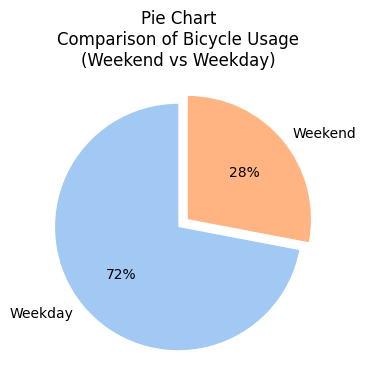

In [27]:
plt.figure(figsize=(4, 4))

explode = (0, 0.1)
palette_color = sns.color_palette('pastel')

plt.pie(total_cnt_perweekend["cnt"],
        labels=total_cnt_perweekend["is_weekend"],
        autopct='%1.f%%',
        startangle=90,
        pctdistance=0.6,
        explode=explode,
        colors=palette_color
        )

plt.title('Pie Chart\nComparison of Bicycle Usage\n(Weekend vs Weekday)')
plt.show()

**Insight:**
- Grafik `tren penggunaan sepeda per bulan per tahun` tersebut memvisualisasikan tren penggunaan sepeda dari bulan januari hingga bulan desember pada tahun 2011 dan 2012. Pada 2011, penggunaan terendah berada di bulan januari. Tetapi seiring waktu penggunaan sepeda mengalami kenaikan yang cukup signifikan hingga bulan mei. Puncak tertingginya berada di bulan juni dan pada akhirnya mengalami penurunan di bulan oktober hingga desember. Sedangkan pada tahun 2012, tren terendah ada di bulan janurari. kemudian mengalami kenaikan dari bulan februari hingga september yang cukup konsisten. Pada bulan oktober hingga desember, cenderung mengalmi penurunan penggunaan sepeda.
- Grafik `Perbandingan penggunaan sepeda antara hari kerja dan akhir pekan` menginformasikan perbedaan antara penggunaan sepeda pada hari kerja dengan akhir pekan. Grafik tersebut menunjukkan perbedaan yang cukup tinggi penggunaan sepada pada hari kerja sebesar 72% dibandingkan penggunaan sepeda pada akhir pekan sebesar 28%

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Bagaimana tren Penggunaan Sepeda per Bulan per Tahun

Tren penggunaan sepeda di tahun 2011 dan 2012 menunjukkan fluktuasi yang serupa, dengan puncak penggunaan sepeda terjadi pada bulan Juni, diikuti oleh penurunan signifikan pada akhir tahun. Pada kedua tahun tersebut, penggunaan sepeda lebih tinggi menjelang musim panas dan cenderung turun pada bulan-bulan terakhir tahun ini.

- Conclution pertanyaan 2: Bagaimana perbandingan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan

Penggunaan sepeda lebih dominan pada hari kerja, mencakup 72% dari total penggunaan sepeda, dibandingkan dengan hanya 28% pada akhir pekan. Ini menunjukkan bahwa sepeda lebih sering digunakan untuk kegiatan rutin, seperti perjalanan kerja, daripada untuk rekreasi pada akhir pekan.

In [30]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_name,year,is_weekend
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Jan,2011,Weekend
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Jan,2011,Weekend
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Jan,2011,Weekday
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Jan,2011,Weekday
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Jan,2011,Weekday
